In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from astropy.io import fits
from matplotlib.colors import LogNorm
from matplotlib import cm
import sys
import os

In [3]:
def press(event):
    if event.key=='q':  
        plt.close()

In [4]:
def onclick(event):
    xpos=event.xdata
    ypos=event.ydata
    x_bund.append(xpos)
    y_bund.append(ypos)
    ax1.plot(x_bund, y_bund, 'b-')
    ax0.plot(x_bund, y_bund, 'b-')
    fig.canvas.draw_idle()

In [5]:
# Key input parameters:

path_infiles = '/vol/ph/astro_data/pmassana/' # Directory where the .in files are located (input to Edouard's code)
solutions = ['radl2000-1_bab18']
#solutions = ['1']

# Secondary input parameters:

delta = 0.05 # distance between lines (chi2)
delta2 = 0.1 # distance between lines (bundle info)
minmax=(-50,50) # for the residual CMD
up_init, up2_init = 0.95, 0.9 # upper position to start writing text

OSError: Header missing END card.

/user/HS128/pm00518/anaconda3/lib/python3.7/site-packages/matplotlib/image.py:397: UserWarning: Warning: converting a masked element to nan.
  dv = (np.float64(self.norm.vmax) -
/user/HS128/pm00518/anaconda3/lib/python3.7/site-packages/matplotlib/image.py:398: UserWarning: Warning: converting a masked element to nan.
  np.float64(self.norm.vmin))
/user/HS128/pm00518/anaconda3/lib/python3.7/site-packages/matplotlib/image.py:405: UserWarning: Warning: converting a masked element to nan.
  a_min = np.float64(newmin)
/user/HS128/pm00518/anaconda3/lib/python3.7/site-packages/matplotlib/image.py:410: UserWarning: Warning: converting a masked element to nan.
  a_max = np.float64(newmax)
/user/HS128/pm00518/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:1110: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0
/user/HS128/pm00518/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:1113: RuntimeWarning: divide by zero encountered in log
  resdat -= n

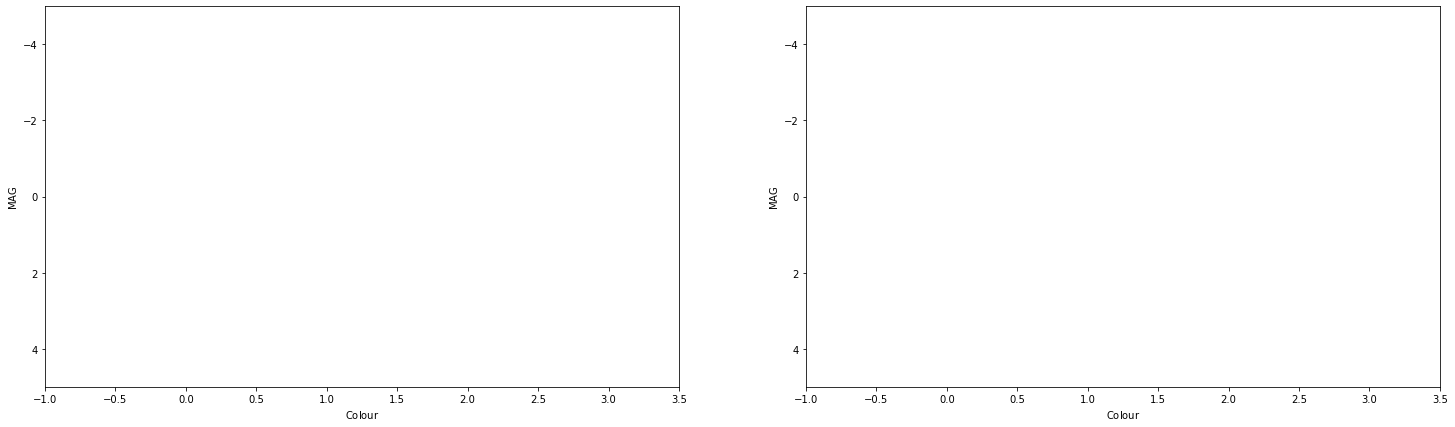

In [7]:
# The code starts:

KEYW = 'Best solution at'
KEY_bundle = 'b = '

for i in np.arange(len(solutions)):
    solution = solutions[i]

    up, up2 = up_init, up2_init

    # figure definition:
    fig = plt.figure(figsize=(25,7))
    gs = GridSpec(1, 2)
    ax0 = plt.subplot(gs[0,0]) # Observed CMD
    ax0.set_xlabel(r'$\rm Colour$')
    ax0.set_ylabel(r'$\rm MAG$')
    ax1 = plt.subplot(gs[0,1]) # Mother CMD
    ax1.set_xlabel(r'$\rm Colour$')
    ax1.set_ylabel(r'$\rm MAG$')

    in_file = open(path_infiles+solution+'.in', 'r')  # Open filename
    for line in in_file:                 # Check each line
        if line.startswith('ran_c = '): # line starting with 'ran_c = '
            xlim1, xlim2 = float(line.split(' = ')[1].strip('[').strip(']\n').split(',')[0]), float(line.split(' = ')[1].strip('[').strip(']\n').split(',')[1])
        elif line.startswith('ran_m = '): # line starting with 'ran_m = '
            ylim1, ylim2 = float(line.split(' = ')[1].strip('[').strip(']\n').split(',')[0]), float(line.split(' = ')[1].strip('[').strip(']\n').split(',')[1])
    in_file.close()
   
    ax1.set_ylim(ylim1,ylim2)
    ax1.set_xlim(xlim1,xlim2)
    ax0.set_ylim(ylim1,ylim2)
    ax0.set_xlim(xlim1,xlim2)

    #in_file = open(path_infiles+solution+'.in', 'r')  # Open filename
    #for line in in_file:                 # Check each line
    #    if line.startswith('obscmd = '): # line starting with 'obscmd = '
    #        obs_name = str(line.strip('obscmd = ').strip('\n'))[1:-1]
    #        print(obs_name)
    #    elif line.startswith('modcmd = '): # line starting with 'modcmd = '
    #        mod_name = str(line.strip('obscmd = ').strip('\n'))[1:-1]
    #        print(mod_name)
    #in_file.close()
    
    obs_name = '/vol/ph/astro_data/pmassana/SMASH_DATA/SMC_contiguous_catalogue/combined_fields_allobj_largeG_02_error.fits'
    mod_name = '/vol/ph/astro_data/pmassana/Mother_CMDs/LMC_0.03_14.0_0.0001_0.025_q0.1_b0.5_eta0.2.hrd'
    
    # observed CMD

    fobs = fits.open(obs_name)
    obs  = fobs[1].data
    fobs.close()
    colour = obs.field('G') - obs.field('I')
    magnitude = obs.field('G')
   
    bins = np.array([[xlim1,xlim2],[ylim2,ylim1]])
    Ho, xedges, yedges = np.histogram2d(colour, magnitude, normed = False, bins=150, range=bins)
    den_masked = np.rot90(Ho)
    den_masked = np.flipud(den_masked)
    Homasked = np.ma.masked_where(den_masked==0,den_masked) # Mask pixels with a value of 0
    extent = [xedges[0], xedges[-1],yedges[0], yedges[-1]]
    #im = ax0.imshow(Homasked, extent=extent, interpolation='nearest',aspect='auto', origin='lower',zorder=0, vmin = 0.0, vmax = 1.0)
    #im = ax0.imshow(Homasked, extent=extent, interpolation='nearest',cmap='jet', aspect='auto', origin='lower',zorder=0, vmin = 0.0, vmax = 1.0)
    im = ax0.imshow(Homasked, extent=extent, interpolation='nearest',aspect='auto', cmap='jet' , origin='lower',zorder=0, norm=LogNorm())

    # Mother CMD

    fmod = fits.open(mod_name)
    mod  = fmod[1].data
    fmod.close()
    colour = mod.field('G') - mod.field('I')
    magnitude = mod.field('G')

    s = np.arange(len(colour))

    colour = colour[s][0:int(0.1*float(len(colour)))]
    magnitude = magnitude[s][0:int(0.1*float(len(magnitude)))]
   
    bins = np.array([[xlim1,xlim2],[ylim2,ylim1]])
    Ho, xedges, yedges = np.histogram2d(colour, magnitude, normed = False, bins=150, range=bins)
    den_masked = np.rot90(Ho)
    den_masked = np.flipud(den_masked)
    Homasked = np.ma.masked_where(den_masked==0,den_masked) # Mask pixels with a value of 0
    extent = [xedges[0], xedges[-1],yedges[0], yedges[-1]]
    #im = ax0.imshow(Homasked, extent=extent, interpolation='nearest',aspect='auto', origin='lower',zorder=0, vmin = 0.0, vmax = 1.0)
    #im = ax0.imshow(Homasked, extent=extent, interpolation='nearest',cmap='jet', aspect='auto', origin='lower',zorder=0, vmin = 0.0, vmax = 1.0)
    im = ax1.imshow(Homasked, extent=extent, interpolation='nearest',aspect='auto', cmap='jet' , origin='lower',zorder=0, norm=LogNorm())

    bundle = 0
    in_file = open(path_infiles+solution+'.in', 'r')  # Open filename
    for line in in_file:                 # Check each line
        if line.startswith(KEY_bundle):
            bundle += 1
            colours, mags = [], []
            for j in np.arange(len(line.split(' = ')[1].split('], [')[0].strip('[[').split(','))):
                colours.append(float(line.split(' = ')[1].split('], [')[0].strip('[[').split(',')[j]))
                mags.append(float(line.split(' = ')[1].split('], [')[1].strip(']] \n').split(',')[j]))
            ax1.plot(colours,mags, 'r', alpha = 0.5)
            ax0.plot(colours,mags, 'r', alpha = 0.5)
            ax1.annotate(str(bundle), (np.mean(colours), np.mean(mags)), xycoords='data', fontsize=20, color="r", bbox=dict(boxstyle='round,pad=0.5', fc='white', alpha=0.5))
    in_file.close()

    x_bund, y_bund = [], []

    cid = fig.canvas.mpl_connect('button_press_event', onclick)        
    cid = fig.canvas.mpl_connect('key_press_event', press)

    plt.show()

    x_bund.append(x_bund[0])
    y_bund.append(y_bund[0])

    print('b = ['+str(x_bund)+', '+str(y_bund)+']')